<img align="left" style="padding-right:10px;" width="150" src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/6c/Star_Wars_Logo.svg/320px-Star_Wars_Logo.svg.png" />

# Preparación del entorno

Padawan! Cuando inicies sesión en Colab, prepara el entorno ejecutando el siguiente código.

In [1]:
if 'google.colab' in str(get_ipython()):
    !git clone https://github.com/griu/init_python_b1.git /content/init_python_b1
    !git -C /content/init_python_b1 pull
    %cd /content/init_python_b1

# Ejercicio 1

Para realizar el ejercicio cargamos los datos de *Especies* en STARWARS SWAPI y las librerías principales.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # para el estilo de graficos

entidades = ['planets','starships','vehicles','people','species']
entidades_df = {x: pd.read_pickle('www/' + x + '_df.pkl') for x in entidades}

# Datos principales
people_df = entidades_df['people'][["height","mass","birth_year","gender","homeworld"]].dropna()

people_df.head()

,height,mass,birth_year,gender,homeworld
name,,,,,
Luke Skywalker,172.0,77.0,19.0,male,http://swapi.dev/api/planets/1/
C-3PO,167.0,75.0,112.0,none,http://swapi.dev/api/planets/1/
R2-D2,96.0,32.0,33.0,none,http://swapi.dev/api/planets/8/
Darth Vader,202.0,136.0,41.9,male,http://swapi.dev/api/planets/1/
Leia Organa,150.0,49.0,19.0,female,http://swapi.dev/api/planets/2/


## Ejercicio 1.1. 

Construye un gráfico de dispersión de los personajes donde se visualice: la altura (height), el peso (mass), la edad en años BBY (birth_year) y el género (gender). Para ello utiliza la función `sns.scatterplot()` de la librería seaborn. Aprovecha todos los parámetros: `x`, `y`, `size`, `hue` y `style` (consulta la ayuda de la función [.scatterplot()](https://seaborn.pydata.org/generated/seaborn.scatterplot.html).

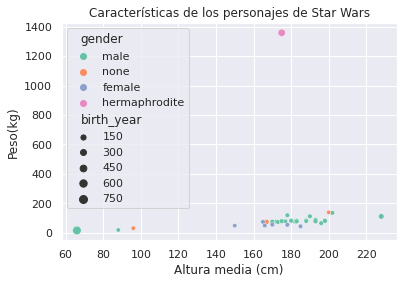

In [3]:
# Solución:
import seaborn as sns
sns.set()
sns.scatterplot(x='height', y='mass'
            , hue='gender', size='birth_year' 
            , style=None, palette="Set2"
            , data=people_df);

plt.title("Características de los personajes de Star Wars")
plt.xlabel("Altura media (cm)")
plt.ylabel("Peso(kg)");
plt.show();


## Ejercicio 1.2.

Sobre el gráfico del ejercicio 1.1:

- Pon título al gráfico y a los ejes x e y. 
- Modifica los límites del eje y para que aparezcan sólo personajes de menos de 150 Kg de peso.
- Sitúa en el gráfico los nombres de "Darth Vader" y "Anakin Skywalker". ¿Cómo es posible tengan un peso y altura tan distintos si eran la misma persona?

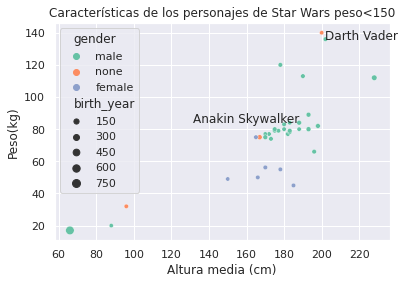

In [4]:
# Solución:

sns.scatterplot(x='height', y='mass'
            , hue='gender', size='birth_year' 
            , style=None, palette="Set2"
            , data=people_df[people_df.mass<150]);
plt.title("Características de los personajes de Star Wars peso<150")
plt.xlabel("Altura media (cm)")
plt.ylabel("Peso(kg)");

person_txt =  "Anakin Skywalker"
plt.text(people_df.height[people_df.index==person_txt]
         , people_df.mass[people_df.index==person_txt]
         , person_txt, ha='right')

person_txt =  "Darth Vader"
plt.text(people_df.height[people_df.index==person_txt]
         , people_df.mass[people_df.index==person_txt]
         , person_txt, ha='left')

plt.show();

La armadura de Darth Vader era un soporte de vida móvil que Darth Vader fue forzado a usar para compensar las graves heridas que sufrió después de su duelo con Obi-Wan Kenobi en Mustafar en 19 ABY. El traje fue construido usando varios métodos de Alquimia Sith que sirvieron para aumentar la fuerza física gravemente disminuida de Vader y su vitalidad, el peso de la armadura es lo que responde a esa diferencia en kg, en cuanto a diferencia de altura el casco de su armadura tenía una cresta elevada que iba de entre los ojos a la parte posterior de su cabeza

## Ejercicio 1.3.

Utiliza las *list comprehension* para calcular el cuadrado de los valores positivos de la siguiente lista:

Muestra el resultado por pantalla.

In [5]:
val = [5, 6, -1, 2, -3, -7, 9, 1]

In [6]:
# Solución:

[i**2 for i in val if i > 0]

[25, 36, 4, 81, 1]

## Ejercicio 1.4.

Construye un diccionario donde se identifique, mediante claves y valores, las siguientes características del personaje Yoda: "nombre", "altura", "peso", "edad" y "genero". Utiliza los datos de people_df.

Muestra el diccionario por pantalla.

In [7]:
# Solución:
dfyoda = people_df[people_df.index.values == "Yoda"]
dicc_Yoda = { "nombre": dfyoda.index[0]
             , "altura":dfyoda.height[0]
             , "peso":dfyoda.mass[0]
             , "edad":dfyoda.birth_year[0]
             , "genero":dfyoda.gender[0]}

print(dicc_Yoda)

{'nombre': 'Yoda', 'altura': 66.0, 'peso': 17.0, 'edad': 896.0, 'genero': 'male'}


## Ejercicio 1.5.

Calcula, a partir de los vectores numpy de altura y peso, definidos a continuación, el [índice de masa corporal (IMC)](https://es.wikipedia.org/wiki/%C3%8Dndice_de_masa_corporal) de los personajes de star wars contenidos en people_df: 

$IMC = \frac{peso}{altura^{2}}$ donde altura está en metros y el peso en kg.

Muestra los datos por pantalla.

In [8]:
# Solución:

people_df["IMC"] = people_df.mass / (people_df.height/100)**2
people_df.head()


,height,mass,birth_year,gender,homeworld,IMC
name,,,,,,
Luke Skywalker,172.0,77.0,19.0,male,http://swapi.dev/api/planets/1/,26.027582
C-3PO,167.0,75.0,112.0,none,http://swapi.dev/api/planets/1/,26.892323
R2-D2,96.0,32.0,33.0,none,http://swapi.dev/api/planets/8/,34.722222
Darth Vader,202.0,136.0,41.9,male,http://swapi.dev/api/planets/1/,33.330066
Leia Organa,150.0,49.0,19.0,female,http://swapi.dev/api/planets/2/,21.777778


## Ejercicio 1.6.

A partir del IMC que has calculado en el ejercicio 1.5. Construye un panel con dos histogramas:

- Un histograma con toda la muestra
- Un histograma seleccionando los valores con un IMC inferior a 100.

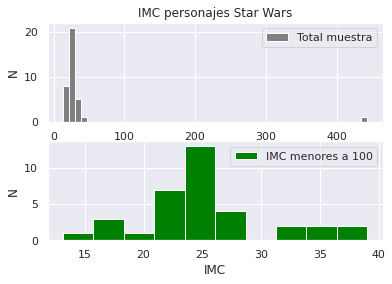

In [9]:
# Solución:
plt.figure();  # crea la figura del plot

# histogrma de toda la muestra.
plt.subplot(2, 1, 1) # (filas, columnas, número de panel)
plt.hist(people_df.IMC, 50, color="grey", label="Total muestra")
plt.xlabel("IMC") 
plt.ylabel("N")
plt.legend();
plt.title("IMC personajes Star Wars")

# Filtrado
plt.subplot(2, 1, 2)
plt.hist(people_df.IMC[people_df.IMC < 100], color="green", label="IMC menores a 100");
plt.xlabel("IMC")
plt.ylabel("N")
plt.legend()
plt.show();

## Ejercicio 1.7.

A partir del vector 1 y 2 que se definen a continuación contesta las siguientes preguntas:

- Calcula el shape, ndim, size del vector1 y vector2
- Explica cual es la diferencia entre vector1 y vector2 a partir de los que hayas observado

In [10]:
vector1 = np.hstack([people_df.height,people_df.mass])
vector2 = np.vstack([people_df.height,people_df.mass])

In [11]:
np.array([1,2,3]).shape

(3,)

In [12]:
# Solución:
print("El shape del vector1 es {}, el ndim es {} y el size es {}".format( vector1.shape, vector1.ndim, vector1.size))
print("El shape del vector2 es {}, el ndim es {} y el size es {}".format( vector2.shape, vector2.ndim, vector2.size))


El shape del vector1 es (72,), el ndim es 1 y el size es 72
El shape del vector2 es (2, 36), el ndim es 2 y el size es 72


**Explicación**: vector1 es un array unidimensional, que es equivalente a un array de 72 filas y una columna, en cambio vector2 es una array bidimensional de 36 filas y 2 columnas.


## Ejercicio 1.8.

Crea una copia de people_df llamada personajes_df y renombra las columnas con su traducción al castellano. 

Muestra los 5 primeros registros del nuevo data frame con `.head()`.

In [13]:
# Solución:
personajes_df = people_df.copy()
personajes_df.rename(columns = {'height' : 'altura',
                                'mass' : 'peso','birth_year':'edad',
                                'gender':'genero', 'homeworld':'mundo_origen',
                                'IMC':'IMC'}, inplace = True)
personajes_df.head()


,altura,peso,edad,genero,mundo_origen,IMC
name,,,,,,
Luke Skywalker,172.0,77.0,19.0,male,http://swapi.dev/api/planets/1/,26.027582
C-3PO,167.0,75.0,112.0,none,http://swapi.dev/api/planets/1/,26.892323
R2-D2,96.0,32.0,33.0,none,http://swapi.dev/api/planets/8/,34.722222
Darth Vader,202.0,136.0,41.9,male,http://swapi.dev/api/planets/1/,33.330066
Leia Organa,150.0,49.0,19.0,female,http://swapi.dev/api/planets/2/,21.777778


## Ejercicio 1.9.

Haz el mismo cálculo de IMC que has hecho en 1.5. pero directamente sobre el objeto personajes_df.

Ordena el data frame de mayor a menor IMC y muestra el nombre e IMC de los personajes con IMC por encima de 30.

> ¿Sabias que IMC por encima de 30 se considera obeso?


In [14]:
# Solución:

personajes_df["IMC"] = personajes_df.peso / (personajes_df.altura/100)**2

personajes_df[personajes_df['IMC'] > 30].sort_values(by=['IMC'], ascending=False)[["IMC"]]


,IMC
name,
Jabba Desilijic Tiure,443.428571
Yoda,39.026630
Owen Lars,37.874006
IG-88,35.000000
R2-D2,34.722222
Darth Vader,33.330066
Bossk,31.301939


## Ejercicio 1.10.

Inserta un valor faltante en los valores de IMC que sean superiores a 100 y dibuja el histograma del IMC transformado con `.plot.hist()`.

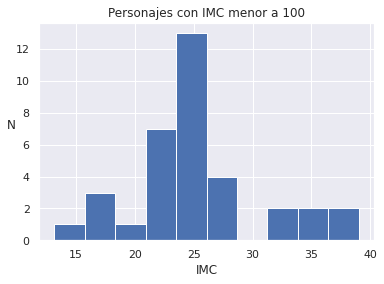

In [15]:
# Solución:
personajes_df[personajes_df["IMC"]>100] = np.nan
ax = personajes_df.IMC.plot.hist()
plt.title('Personajes con IMC menor a 100')
ax.set_xlabel("IMC")
ax.set_ylabel("N", rotation=0);
plt.show();